## Classification Performance

### Load the data

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
digX = digits['data']
digy = digits['target']

### Some Visualisations

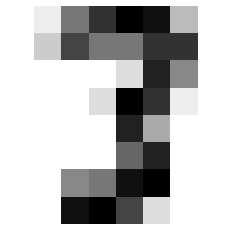

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = digX[23]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

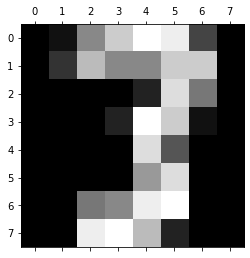

In [3]:
# Approach in scikit-learn documentation
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[23]) 
plt.show() 

### Build a binary classifier

In [4]:
digX_train, digX_test, digy_train, digy_test = digX[:1400], digX[1400:], digy[:1400], digy[1400:]

In [5]:
y_train_7 = (digy_train == 7)
y_test_7 = (digy_test == 7)

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(digX_train, y_train_7)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
clf.predict([digX_train[7]])

array([ True])

In [8]:
digy_test_pred = clf.predict(digX_test)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_7, digy_test_pred)

array([[358,   0],
       [  5,  34]])

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test_7, digy_test_pred)
recall_score(y_test_7, digy_test_pred)
f1_score(y_test_7, digy_test_pred)


0.9315068493150686

### Multiple Classes

In [11]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(LogisticRegression())
ovr_clf.fit(digX_train, digy_train)
digy_test_pred = ovr_clf.predict(digX_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [12]:
confusion_matrix(digy_test, digy_test_pred)

array([[37,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 30,  0,  2,  0,  0,  0,  0,  3,  4],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 28,  0,  2,  0,  2,  6,  0],
       [ 0,  1,  0,  0, 38,  0,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  3,  1],
       [ 0,  3,  0,  0,  1,  0,  0,  0, 35,  0],
       [ 1,  2,  0,  2,  0,  0,  0,  1,  0, 35]])

### Linear regression and Stochastic Gradient Descent

In [13]:
diabdata = datasets.load_diabetes()
diabX = diabdata["data"]
diaby = diabdata["target"]

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(diabX, diaby)
reg.score(diabX, diaby)
reg.coef_
reg.intercept_

152.1334841628965

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(diabX, diaby)
sgd_reg.score(diabX, diaby)
sgd_reg.coef_
sgd_reg.intercept_


array([152.13312312])

## Polynomial Features

In [16]:
import numpy as np
import numpy.random as rnd
np.random.seed(42)
rnd1D = rnd.rand(10,1)*5
rnd1D

array([[1.87270059],
       [4.75357153],
       [3.65996971],
       [2.99329242],
       [0.7800932 ],
       [0.7799726 ],
       [0.29041806],
       [4.33088073],
       [3.00557506],
       [3.54036289]])

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X3_poly = poly_features.fit_transform(rnd1D)
X3_poly

array([[1.87270059e+00, 3.50700752e+00, 6.56757506e+00],
       [4.75357153e+00, 2.25964423e+01, 1.07413805e+02],
       [3.65996971e+00, 1.33953783e+01, 4.90266787e+01],
       [2.99329242e+00, 8.95979952e+00, 2.68193000e+01],
       [7.80093202e-01, 6.08545404e-01, 4.74722133e-01],
       [7.79972602e-01, 6.08357259e-01, 4.74501994e-01],
       [2.90418061e-01, 8.43426501e-02, 2.44946289e-02],
       [4.33088073e+00, 1.87565279e+01, 8.12322852e+01],
       [3.00557506e+00, 9.03348143e+00, 2.71508065e+01],
       [3.54036289e+00, 1.25341694e+01, 4.43755081e+01]])

In [18]:
rnddata = rnd.rand(20,1)*5
rnd2D = rnddata.reshape(10,2)
rnd2D

array([[0.10292247, 4.84954926],
       [4.1622132 , 1.06169555],
       [0.90912484, 0.91702255],
       [1.52121121, 2.62378216],
       [2.15972509, 1.4561457 ],
       [3.05926447, 0.6974693 ],
       [1.46072324, 1.83180922],
       [2.28034992, 3.92587981],
       [0.99836891, 2.57117219],
       [2.96207284, 0.23225206]])

In [19]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly_features.fit_transform(rnd2D)
X2_poly

array([[1.02922471e-01, 4.84954926e+00, 1.05930351e-02, 4.99127595e-01,
        2.35181280e+01],
       [4.16221320e+00, 1.06169555e+00, 1.73240188e+01, 4.41900325e+00,
        1.12719745e+00],
       [9.09124836e-01, 9.17022549e-01, 8.26507967e-01, 8.33687975e-01,
        8.40930356e-01],
       [1.52121121e+00, 2.62378216e+00, 2.31408356e+00, 3.99132684e+00,
        6.88423281e+00],
       [2.15972509e+00, 1.45614570e+00, 4.66441248e+00, 3.14487441e+00,
        2.12036030e+00],
       [3.05926447e+00, 6.97469303e-01, 9.35909912e+00, 2.13374306e+00,
        4.86463429e-01],
       [1.46072324e+00, 1.83180922e+00, 2.13371239e+00, 2.67576630e+00,
        3.35552501e+00],
       [2.28034992e+00, 3.92587981e+00, 5.19999576e+00, 8.95237971e+00,
        1.54125323e+01],
       [9.98368911e-01, 2.57117219e+00, 9.96740482e-01, 2.56697838e+00,
        6.61092644e+00],
       [2.96207284e+00, 2.32252064e-01, 8.77387553e+00, 6.87947531e-01,
        5.39410210e-02]])

## Logistic Regression

In [20]:
iris  = datasets.load_iris()
#iris

In [21]:
X = iris["data"]
#X

In [22]:
y = iris["target"]
#y

In [23]:
from sklearn.linear_model import LogisticRegression
lrmulticlf = LogisticRegression() # Not necessary to parameterise
lrmulticlf.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = lrmulticlf.predict(X)
#y_pred
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

### Back to the digits data

In [25]:
#digX_train, digX_test, digy_train, digy_test
lrdigitclf = LogisticRegression()
lrdigitclf.fit(digX_train,digy_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
digipreds = lrdigitclf.predict(digX_test)
#digipreds
confusion_matrix(digy_test, digipreds)

array([[36,  0,  0,  0,  1,  0,  2,  0,  0,  0],
       [ 0, 33,  0,  1,  0,  0,  0,  0,  0,  5],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  2,  0,  1,  6,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  3],
       [ 0,  2,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 37,  1,  0],
       [ 1,  1,  0,  0,  1,  2,  0,  0, 33,  1],
       [ 0,  2,  0,  2,  0,  0,  0,  0,  0, 37]])